# Data Preprocessing 

In [56]:
#!pip install tqdm


In [2]:
%%time
from ipywidgets import IntProgress, HTML, VBox
from IPython.display import display
import time
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
from pandas.core.reshape.merge import merge
from tqdm import tqdm
import time

CPU times: user 2.11 s, sys: 250 ms, total: 2.36 s
Wall time: 939 ms


In [3]:
data = pd.read_csv('/Users/ds/Desktop/Projects/ISM/Data/AB_US_2020.csv')

/var/folders/ml/6gklcgzd4hd14qnjtg492b2c0000gn/T/ipykernel_50029/4192174057.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/ds/Desktop/Projects/ISM/Data/AB_US_2020.csv')


In [4]:
data=pd.DataFrame(data)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [5]:
data.shape


(226030, 17)

In [6]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

In [8]:
data.isnull().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

In [9]:
new_data=data.drop_duplicates()

In [10]:
new_data.shape

(226030, 17)

<Axes: >

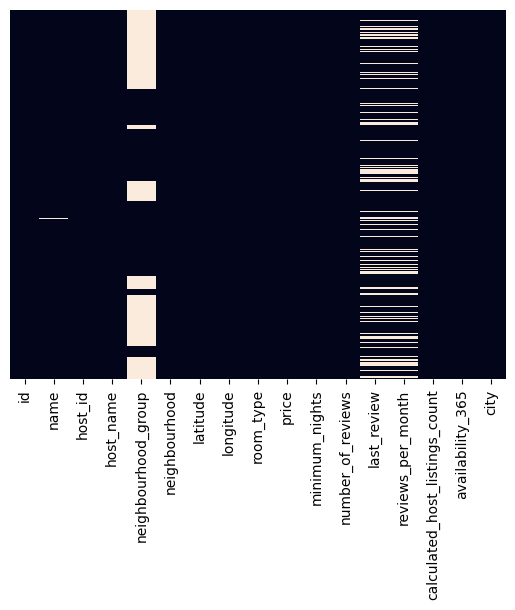

In [11]:
sns.heatmap(new_data.isnull(),yticklabels=False,cbar=False)

### Removing neighbourhood_group ,last_review and review_per_month

In [12]:
new_data = new_data.drop(['neighbourhood_group', 'last_review', 'reviews_per_month'], axis=1)



In [13]:
new_data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,28804,35.65146,-82.62792,Private room,60,1,138,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,28801,35.59779,-82.55540,Entire home/apt,470,1,114,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,75,30,89,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,28806,35.57864,-82.59578,Entire home/apt,90,1,267,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,28801,35.61442,-82.54127,Private room,125,30,58,1,0,Asheville


In [14]:
new_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
city                               object
dtype: object

## Remove heading and tailing spaces

In [15]:
new_data_2 = new_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [16]:
#new_data_2 = new_data_2.rename(columns={'neighbourhood': 'zip'})
new_data_2.shape

(226030, 14)

In [17]:
new_data_2['city'].nunique()

28

In [18]:
new_data_2.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,2.260300e+05,2.260300e+05,226030.000000,226030.000000,226030.000000,2.260300e+05,226030.000000,226030.000000,226030.000000
mean,2.547176e+07,9.352385e+07,35.662829,-103.220662,219.716529,4.525490e+02,34.506530,16.698562,159.314856
std,1.317814e+07,9.827422e+07,6.849855,26.222091,570.353609,2.103376e+05,63.602914,51.068966,140.179628
min,1.090000e+02,2.300000e+01,18.920990,-159.714900,0.000000,1.000000e+00,0.000000,1.000000,0.000000
25%,1.515890e+07,1.399275e+07,32.761783,-118.598115,75.000000,1.000000e+00,1.000000,1.000000,0.000000
50%,2.590916e+07,5.138266e+07,37.261125,-97.817200,121.000000,2.000000e+00,8.000000,2.000000,140.000000
75%,3.772624e+07,1.497179e+08,40.724038,-76.919323,201.000000,7.000000e+00,39.000000,6.000000,311.000000
max,4.556085e+07,3.679176e+08,47.734620,-70.995950,24999.000000,1.000000e+08,966.000000,593.000000,365.000000


In [19]:
##new_data_2.to_csv('/Users/ds/Desktop/Projects/ISM/Clean_data/AirBnb_2020_Clean.csv')

In [20]:
new_data_2['city'] = new_data_2['city'].str.replace('San Clara Country', 'Santa Clara County')

## Merging data

In [21]:
population_data=pd.read_csv('/Users/ds/Desktop/Projects/ISM/Data/uscities.csv')
#uszips=pd.read_csv('/Users/ds/Desktop/Projects/ISM/Data/uszips.csv')
#uszips

In [22]:
uscounties=pd.read_csv('/Users/ds/Desktop/Projects/ISM/Data/counties.csv',header=0)
#uszips=uszips[1:]
uscounties[['city', 'state']] = uscounties['county'].str.split(',', expand=True)
uscounties = uscounties.rename(columns={'county': 'county_name'})
uscounties = uscounties.rename(columns={'state': 'state_id'})
uscounties = uscounties.rename(columns={'Data': 'population'})
uscounties['population'] = pd.to_numeric(uscounties['population'].str.replace(',', ''), errors='coerce')
uscounties.dtypes

county_name    object
FIPS Code       int64
population      int64
Rank            int64
city           object
state_id       object
dtype: object

In [23]:
population_data = population_data.rename(columns={'county': 'city'})
population_data.head()
population_data=pd.DataFrame(population_data)
population_data.head()

#population_data = population_data[population_data['population'] > 50000]
population_data

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,Friendship Heights Village,Friendship Heights Village,MD,Maryland,24031,Montgomery,38.9633,-77.0900,5396,34277,polygon,False,True,America/New_York,2,20815,1840073677
1,Manhattan,Manhattan,NY,New York,36061,New York,40.7834,-73.9662,1628706,27545,polygon,False,True,America/New_York,1,10026 10027 10030 10037 10039 10001 10011 1001...,1840034000
2,Guttenberg,Guttenberg,NJ,New Jersey,34017,Hudson,40.7927,-74.0048,11121,22246,polygon,False,True,America/New_York,2,7093,1840003597
3,West New York,West New York,NJ,New Jersey,34017,Hudson,40.7856,-74.0093,52723,20473,polygon,False,True,America/New_York,2,7093,1840001035
4,Union City,Union City,NJ,New Jersey,34017,Hudson,40.7674,-74.0323,67982,20394,polygon,False,True,America/New_York,2,7087,1840001034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28333,Birch Creek,Birch Creek,AK,Alaska,2290,Yukon-Koyukuk,66.2686,-145.8698,4,0,polygon,False,False,America/Anchorage,3,99730,1840023530
28334,Elfin Cove,Elfin Cove,AK,Alaska,2105,Hoonah-Angoon,58.1912,-136.3129,4,0,polygon,False,False,America/Juneau,3,99825,1840023309
28335,Lowman,Lowman,ID,Idaho,16015,Boise,44.0785,-115.6205,4,0,polygon,False,False,America/Boise,3,83637,1840023992
28336,White Rock,White Rock,SD,South Dakota,46109,Roberts,45.9248,-96.5760,3,0,polygon,False,True,America/Chicago,3,57260,1840020692


In [24]:
population_data.dtypes

city             object
city_ascii       object
state_id         object
state_name       object
county_fips       int64
county_name      object
lat             float64
lng             float64
population        int64
density           int64
source           object
military           bool
incorporated       bool
timezone         object
ranking           int64
zips             object
id                int64
dtype: object

In [25]:
#population_data['zip'] = population_data['zip'].astype('object')

In [26]:
cities_unique=new_data_2['city'].unique()
len(cities_unique)

28

In [27]:
array=[]
#total_iterations = 100
city_set = set()  # Use a set to automatically remove duplicates
#for i in tqdm(range(total_iterations), desc="Processing"):
for city in cities_unique:
    if city  in population_data['city'].values  :
        city_set.add(city)
    elif city in population_data['county_name'].values :
        city_set.add(city)
    elif uscounties['city'].str.contains(city, case=False).any():
        city_set.add(city)
    #time.sleep(0.000000001)
print("Task completed!")
array = list(city_set)  # Convert the set back to a list if needed
print((array))

Task completed!
['Rhode Island', 'Hawaii', 'Los Angeles', 'San Francisco', 'Pacific Grove', 'Cambridge', 'Boston', 'San Diego', 'San Mateo County', 'Clark County', 'Austin', 'New York City', 'Oakland', 'Denver', 'Salem', 'Columbus', 'Asheville', 'Nashville', 'Seattle', 'Twin Cities MSA', 'Portland', 'Broward County', 'Jersey City', 'Washington D.C.', 'Santa Clara County', 'Chicago', 'Santa Cruz County', 'New Orleans']


In [28]:
result = [x for x in cities_unique if x not in array]
result

[]

In [29]:
# Create an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Iterate through unique cities
for city in cities_unique:
    # Check if the city is in population_data['city']
    if city in population_data['city'].values:
        # Extract data for the city from population_data
        city_data = population_data[population_data['city'] == city]
    # If not found in 'city', check if it's in 'county_name'
    elif city in population_data['county_name'].values:
        # Extract data for the city from population_data based on county_name
        city_data = population_data[population_data['county_name'] == city]
    # If not found in population_data, check uscounties using case-insensitive search
    elif uscounties['city'].str.contains(city, case=False).any():
        # Extract data for the city from uscounties based on case-insensitive search
        city_data = uscounties[uscounties['city'].str.contains(city, case=False)]
    else:
        # If city is not found in any dataset, skip it
        continue

    # Ensure that the 'population' column is numeric
    #city_data['population'] = pd.to_numeric(city_data['population'], errors='coerce')
    
    # Check if there are missing or non-numeric population values
    if city_data['population'].isna().any():
        # Skip this city if there are missing or non-numeric population values
        continue

    # Find the row with the highest population
    city_with_highest_population = city_data.loc[city_data['population'].idxmax()]

    # Append the city_with_highest_population to the merged_data DataFrame
    merged_data = pd.concat([merged_data, city_with_highest_population.to_frame().T], ignore_index=True)



print("Task completed!")


Task completed!


In [31]:
#merged_data.to_csv('/Users/ds/Desktop/Projects/ISM/merged_data.csv')

In [30]:
# List of columns you want to keep
columns_to_keep = ['city', 'city_ascii', 'state_id','state_name','county_name','population']

# Drop all columns except the ones specified in columns_to_keep
merged_data = merged_data[columns_to_keep]
merged_data

,city,city_ascii,state_id,state_name,county_name,population
0,Asheville,Asheville,NC,North Carolina,Buncombe,312507
1,Austin,Austin,TX,Texas,Travis,1687311
2,Boston,Boston,MA,Massachusetts,Suffolk,4688346
3,Broward County,NaN,FL,NaN,"Broward County, FL",83739
4,Cambridge,Cambridge,MA,Massachusetts,Middlesex,118927
5,Chicago,Chicago,IL,Illinois,Cook,8604203
6,Clark County,NaN,NV,NaN,"Clark County, NV",85283
7,Columbus,Columbus,OH,Ohio,Franklin,1562009
8,Denver,Denver,CO,Colorado,Denver,2876625
9,Hilo,Hilo,HI,Hawaii,Hawaii,45056


In [31]:
new_data_3 = pd.merge(new_data_2, merged_data, on='city', how='left')
new_data_3

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,city,city_ascii,state_id,state_name,county_name,population
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,28804,35.651460,-82.627920,Private room,60,1,138,1,0,Asheville,Asheville,NC,North Carolina,Buncombe,312507
1,80905,French Chic Loft,427027,Celeste,28801,35.597790,-82.555400,Entire home/apt,470,1,114,11,288,Asheville,Asheville,NC,North Carolina,Buncombe,312507
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,28801,35.606700,-82.555630,Entire home/apt,75,30,89,2,298,Asheville,Asheville,NC,North Carolina,Buncombe,312507
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,28806,35.578640,-82.595780,Entire home/apt,90,1,267,5,0,Asheville,Asheville,NC,North Carolina,Buncombe,312507
4,160594,Historic Grove Park,769252,Elizabeth,28801,35.614420,-82.541270,Private room,125,30,58,1,0,Asheville,Asheville,NC,North Carolina,Buncombe,312507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226025,45506143,"DC Hidden In Plain ""Site""",25973146,Marci,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.903880,-77.029730,Entire home/apt,104,1,0,2,99,Washington D.C.,Washington,DC,District of Columbia,District of Columbia,5379184
226026,45511428,DC 3 BR w/ screen porch 3 blck to metro w/ par...,231133074,Thomas,"Brookland, Brentwood, Langdon",38.920820,-76.990980,Entire home/apt,151,2,0,1,300,Washington D.C.,Washington,DC,District of Columbia,District of Columbia,5379184
226027,45514685,Charming Penthouse Apt w/ Rooftop Terrace in L...,33758935,Bassem,"Shaw, Logan Circle",38.911170,-77.033540,Entire home/apt,240,2,0,1,173,Washington D.C.,Washington,DC,District of Columbia,District of Columbia,5379184
226028,45516412,Adams Morgan/Nat'l Zoo 1 BR Apt #32,23193071,Michael,"Kalorama Heights, Adams Morgan, Lanier Heights",38.926630,-77.044360,Entire home/apt,60,21,0,5,362,Washington D.C.,Washington,DC,District of Columbia,District of Columbia,5379184


In [32]:
#new=new_data_3.isna().sum().sum()

none_counts = new_data_3.isna().sum()
none_counts

id                                    0
name                                 28
host_id                               0
host_name                            33
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
city                                  0
city_ascii                        53217
state_id                          22434
state_name                        53217
county_name                       22434
population                        22434
dtype: int64

# Importing Flights Traffic DataSet

In [33]:
flights_traffic=pd.read_csv('/Users/ds/Desktop/Projects/ISM/Clean_data/Flights_Dataset_Reformatted.csv')
flights_traffic

/var/folders/ml/6gklcgzd4hd14qnjtg492b2c0000gn/T/ipykernel_55238/258589961.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_traffic=pd.read_csv('/Users/ds/Desktop/Projects/ISM/Clean_data/Flights_Dataset_Reformatted.csv')


,Origin_airport,Destination_airport,Origin_city,Origin_City,Origin_State,Destination_city,Destination_City,Destination_State,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS",Manhattan,Kansas,"Ames, IA",Ames,Iowa,21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR",Eugene,Oregon,"Bend, OR",Bend,Oregon,41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR",Eugene,Oregon,"Bend, OR",Bend,Oregon,88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR",Eugene,Oregon,"Bend, OR",Bend,Oregon,11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR",Medford,Oregon,"Bend, OR",Bend,Oregon,0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606798,STL,TBN,"St. Louis, MO",St. Louis,Missouri,"Fort Leonard Wood, MO",Fort Leonard Wood,Missouri,281,969,51,119,2009-02-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606799,STL,TBN,"St. Louis, MO",St. Louis,Missouri,"Fort Leonard Wood, MO",Fort Leonard Wood,Missouri,245,1026,54,119,2009-11-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606800,STL,TBN,"St. Louis, MO",St. Louis,Missouri,"Fort Leonard Wood, MO",Fort Leonard Wood,Missouri,363,1273,67,119,2009-08-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606801,CGI,TBN,"Cape Girardeau, MO",Cape Girardeau,Missouri,"Fort Leonard Wood, MO",Fort Leonard Wood,Missouri,2,19,1,146,2009-08-01,93712,46457,37.225300,-89.570801,37.741600,-92.140701


In [34]:
flights_traffic=flights_traffic.drop(['Destination_airport','Destination_city','Destination_City','Destination_State','Passengers','Seats','Flights','Distance','Fly_date','Origin_population','Destination_population','Dest_airport_lat','Dest_airport_long'],axis=1)

In [35]:
flights_traffic.loc[flights_traffic['Origin_City'] == 'Washington', 'Origin_State'] = 'D.C.'

In [36]:
flights_traffic = flights_traffic.drop_duplicates()
flights_traffic

,Origin_airport,Origin_city,Origin_City,Origin_State,Org_airport_lat,Org_airport_long
0,MHK,"Manhattan, KS",Manhattan,Kansas,39.140999,-96.670799
1,EUG,"Eugene, OR",Eugene,Oregon,44.124599,-123.211998
4,MFR,"Medford, OR",Medford,Oregon,42.374199,-122.873001
9,SEA,"Seattle, WA",Seattle,Washington,47.449001,-122.308998
14,PDX,"Portland, OR",Portland,Oregon,45.588699,-122.598000
...,...,...,...,...,...,...
3399954,CRE,"Myrtle Beach, SC",Myrtle Beach,South Carolina,NaN,NaN
3404373,BOK,"Brookings, OR",Brookings,Oregon,NaN,NaN
3479820,BIH,"Bishop, CA",Bishop,California,37.373100,-118.363998
3494631,MQJ,"Indianapolis, IN",Indianapolis,Indiana,NaN,NaN


In [37]:
flights_traffic = flights_traffic[flights_traffic.notna().any(axis=1)]
flights_traffic

,Origin_airport,Origin_city,Origin_City,Origin_State,Org_airport_lat,Org_airport_long
0,MHK,"Manhattan, KS",Manhattan,Kansas,39.140999,-96.670799
1,EUG,"Eugene, OR",Eugene,Oregon,44.124599,-123.211998
4,MFR,"Medford, OR",Medford,Oregon,42.374199,-122.873001
9,SEA,"Seattle, WA",Seattle,Washington,47.449001,-122.308998
14,PDX,"Portland, OR",Portland,Oregon,45.588699,-122.598000
...,...,...,...,...,...,...
3399954,CRE,"Myrtle Beach, SC",Myrtle Beach,South Carolina,NaN,NaN
3404373,BOK,"Brookings, OR",Brookings,Oregon,NaN,NaN
3479820,BIH,"Bishop, CA",Bishop,California,37.373100,-118.363998
3494631,MQJ,"Indianapolis, IN",Indianapolis,Indiana,NaN,NaN


In [38]:
unique_airports = flights_traffic['Origin_airport'].unique()
#df.loc[df['Origin City'] == 'Washington', 'State'] = 'D.C.'

In [39]:
flights_traffic = flights_traffic[flights_traffic['Origin_airport'].isin(unique_airports)]
pd.set_option('display.max_rows', None)
flights_traffic

,Origin_airport,Origin_city,Origin_City,Origin_State,Org_airport_lat,Org_airport_long
0,MHK,"Manhattan, KS",Manhattan,Kansas,39.140999,-96.670799
1,EUG,"Eugene, OR",Eugene,Oregon,44.124599,-123.211998
4,MFR,"Medford, OR",Medford,Oregon,42.374199,-122.873001
9,SEA,"Seattle, WA",Seattle,Washington,47.449001,-122.308998
14,PDX,"Portland, OR",Portland,Oregon,45.588699,-122.598000
38,LMT,"Klamath Falls, OR",Klamath Falls,Oregon,42.156101,-121.733002
49,SFO,"San Francisco, CA",San Francisco,California,37.618999,-122.375000
73,LAX,"Los Angeles, CA",Los Angeles,California,33.942501,-118.407997
77,EAT,"Wenatchee, WA",Wenatchee,Washington,47.398899,-120.207001
78,YKM,"Yakima, WA",Yakima,Washington,46.568199,-120.543999


In [40]:
flights_traffic['Origin_City'] = flights_traffic['Origin_City'].str.replace('Washington', 'Washington D.C.')
#flights_traffic['Destination_City'] = flights_traffic['Destination_City'].str.replace('Washington', 'Washington D.C.')


flights_traffic['Origin_City'] = flights_traffic['Origin_City'].str.replace('Fort Lauderdale', 'Broward County')
#flights_traffic['Destination_City'] = flights_traffic['Destination_City'].str.replace('Fort Lauderdale', 'Broward County')

#flights_traffic['Origin_City'] = flights_traffic['Origin_City'].str.replace('Boston', 'Cambridge')
#flights_traffic['Destination_City'] = flights_traffic['Destination_City'].str.replace('Boston', 'Cambridge')



flights_traffic['Origin_City'] = flights_traffic['Origin_City'].str.replace('Las Vegas', 'Clark County')
#flights_traffic['Destination_City'] = flights_traffic['Destination_City'].str.replace('Las Vegas', 'Clark County')

flights_traffic['Origin_City'] = flights_traffic['Origin_City'].str.replace('Colorado Springs', 'Denver')
#flights_traffic['Destination_City'] = flights_traffic['Destination_City'].str.replace('Colorado Springs', 'Denver')

#Honolulu

flights_traffic['Origin_City'] = flights_traffic['Origin_City'].str.replace('Honolulu', 'Hawaii')
#flights_traffic['Destination_City'] = flights_traffic['Destination_City'].str.replace('Honolulu', 'Hawaii')

#Newark

flights_traffic['Origin_City'] = flights_traffic['Origin_City'].str.replace('Newark', 'Jersey City')
#flights_traffic['Destination_City'] = flights_traffic['Destination_City'].str.replace('Newark', 'Jersey City')


#New York
#if 'JFK' in flights_traffic['Origin_airport'] :
flights_traffic['Origin_City'] = flights_traffic['Origin_City'].str.replace('New York', 'New York City') ##where flights_traffic['Origin_airport']=='JFK';
#if 'JFK' in flights_traffic['Destination_airport']:
#flights_traffic['Destination_City'] = flights_traffic['Destination_City'].str.replace('New York', 'New York City') ##where flights_traffic['Origin_airport']=='JFK';

#San Jose
flights_traffic['Origin_City'] = flights_traffic['Origin_City'].str.replace('San Jose', 'Santa Clara County')
#flights_traffic['Destination_City'] = flights_traffic['Destination_City'].str.replace('San Jose', 'Santa Clara County')

#Providence
flights_traffic['Origin_City'] = flights_traffic['Origin_City'].str.replace('Providence', 'Rhode Island')
#flights_traffic['Destination_City'] = flights_traffic['Destination_City'].str.replace('Providence', 'Rhode Island')

#flights_traffic['Origin_City'] = flights_traffic['Origin_City'].str.replace('San Jose', 'Pacific Grove')
#flights_traffic['Destination_City'] = flights_traffic['Destination_City'].str.replace('San Jose', 'Pacific Grove')

#Minneapolis
flights_traffic['Origin_City'] = flights_traffic['Origin_City'].str.replace('Minneapolis', 'Twin Cities MSA')
#flights_traffic['Destination_City'] = flights_traffic['Destination_City'].str.replace('Minneapolis', 'Twin Cities MSA')







In [41]:
array_2=[]
#total_iterations = 100
city_set = set()  # Use a set to automatically remove duplicates
#for i in tqdm(range(total_iterations), desc="Processing"):
for city in cities_unique:
    if city in flights_traffic['Origin_City'].values  :
        city_set.add(city)
    #elif city in flights_traffic['Destination_City'].values :
        #city_set.add(city)
    #elif uscounties['city'].str.contains(city, case=False).any():
        #city_set.add(city)
    #time.sleep(0.000000001)
print("Task completed!")
array_2 = list(city_set)  # Convert the set back to a list if needed
print((array_2))

Task completed!
['Denver', 'Santa Clara County', 'Broward County', 'Nashville', 'New York City', 'Portland', 'New Orleans', 'Seattle', 'Hawaii', 'Oakland', 'Asheville', 'Rhode Island', 'San Francisco', 'Boston', 'Chicago', 'Austin', 'Jersey City', 'San Diego', 'Clark County', 'Washington D.C.', 'Columbus', 'Twin Cities MSA', 'Los Angeles', 'Salem']


In [42]:
flights_traffic = flights_traffic[flights_traffic['Origin_City'].isin(array_2)]
flights_traffic=flights_traffic.dropna()
flights_traffic = flights_traffic.reset_index(drop=True)
flights_traffic

,Origin_airport,Origin_city,Origin_City,Origin_State,Org_airport_lat,Org_airport_long
0,SEA,"Seattle, WA",Seattle,Washington,47.449001,-122.308998
1,PDX,"Portland, OR",Portland,Oregon,45.588699,-122.598000
2,SFO,"San Francisco, CA",San Francisco,California,37.618999,-122.375000
3,LAX,"Los Angeles, CA",Los Angeles,California,33.942501,-118.407997
4,SLE,"Salem, OR",Salem,Oregon,44.909500,-123.002998
5,SJC,"San Jose, CA",Santa Clara County,California,37.362598,-121.929001
6,FLL,"Fort Lauderdale, FL",Broward County,Florida,26.072599,-80.152702
7,BFI,"Seattle, WA",Seattle,Washington,47.529999,-122.302002
8,LAS,"Las Vegas, NV",Clark County,Nevada,36.080101,-115.152000
9,SAN,"San Diego, CA",San Diego,California,32.733601,-117.190002


In [43]:
#new_data_3.to_csv('/Users/ds/Desktop/Projects/ISM/Viz_Data/AirBnb_2020.csv')

In [44]:

new_row=flights_traffic[flights_traffic['Origin_airport'] == 'BOS'].copy()
new_row['Origin_City']=new_row['Origin_City'].replace('Boston', 'Cambridge')
flights_traffic=flights_traffic.append(new_row,ignore_index=True);
flights_traffic

new_row=flights_traffic[flights_traffic['Origin_airport'] == 'SJC'].copy()
new_row['Origin_City']=new_row['Origin_City'].replace('Santa Clara County', 'Pacific Grove')
flights_traffic=flights_traffic.append(new_row,ignore_index=True);

new_row=flights_traffic[flights_traffic['Origin_airport'] == 'SFO'].copy()
new_row['Origin_City']=new_row['Origin_City'].replace('San Francisco', 'San Mateo County')
flights_traffic=flights_traffic.append(new_row,ignore_index=True);

new_row=flights_traffic[flights_traffic['Origin_airport'] == 'SJC'].copy()
new_row['Origin_City']=new_row['Origin_City'].replace('Santa Clara County', 'Santa Cruz County')
flights_traffic=flights_traffic.append(new_row,ignore_index=True);

flights_traffic

/var/folders/ml/6gklcgzd4hd14qnjtg492b2c0000gn/T/ipykernel_55238/522612009.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights_traffic=flights_traffic.append(new_row,ignore_index=True);
/var/folders/ml/6gklcgzd4hd14qnjtg492b2c0000gn/T/ipykernel_55238/522612009.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights_traffic=flights_traffic.append(new_row,ignore_index=True);
/var/folders/ml/6gklcgzd4hd14qnjtg492b2c0000gn/T/ipykernel_55238/522612009.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights_traffic=flights_traffic.append(new_row,ignore_index=True);
/var/folders/ml/6gklcgzd4hd14qnjtg492b2c0000gn/T/ipykernel_55238/522612009.py:16: FutureWarning: The frame.append method is deprecated and will be rem

,Origin_airport,Origin_city,Origin_City,Origin_State,Org_airport_lat,Org_airport_long
0,SEA,"Seattle, WA",Seattle,Washington,47.449001,-122.308998
1,PDX,"Portland, OR",Portland,Oregon,45.588699,-122.598000
2,SFO,"San Francisco, CA",San Francisco,California,37.618999,-122.375000
3,LAX,"Los Angeles, CA",Los Angeles,California,33.942501,-118.407997
4,SLE,"Salem, OR",Salem,Oregon,44.909500,-123.002998
5,SJC,"San Jose, CA",Santa Clara County,California,37.362598,-121.929001
6,FLL,"Fort Lauderdale, FL",Broward County,Florida,26.072599,-80.152702
7,BFI,"Seattle, WA",Seattle,Washington,47.529999,-122.302002
8,LAS,"Las Vegas, NV",Clark County,Nevada,36.080101,-115.152000
9,SAN,"San Diego, CA",San Diego,California,32.733601,-117.190002


In [45]:
flights_traffic = flights_traffic.drop_duplicates()


In [46]:
flights_traffic = flights_traffic.reset_index(drop=True)
flights_traffic

,Origin_airport,Origin_city,Origin_City,Origin_State,Org_airport_lat,Org_airport_long
0,SEA,"Seattle, WA",Seattle,Washington,47.449001,-122.308998
1,PDX,"Portland, OR",Portland,Oregon,45.588699,-122.598000
2,SFO,"San Francisco, CA",San Francisco,California,37.618999,-122.375000
3,LAX,"Los Angeles, CA",Los Angeles,California,33.942501,-118.407997
4,SLE,"Salem, OR",Salem,Oregon,44.909500,-123.002998
5,SJC,"San Jose, CA",Santa Clara County,California,37.362598,-121.929001
6,FLL,"Fort Lauderdale, FL",Broward County,Florida,26.072599,-80.152702
7,BFI,"Seattle, WA",Seattle,Washington,47.529999,-122.302002
8,LAS,"Las Vegas, NV",Clark County,Nevada,36.080101,-115.152000
9,SAN,"San Diego, CA",San Diego,California,32.733601,-117.190002


In [47]:
result = [x for x in cities_unique if x not in flights_traffic['Origin_City']]
result

['Asheville',
 'Austin',
 'Boston',
 'Broward County',
 'Cambridge',
 'Chicago',
 'Clark County',
 'Columbus',
 'Denver',
 'Hawaii',
 'Jersey City',
 'Los Angeles',
 'Nashville',
 'New Orleans',
 'New York City',
 'Oakland',
 'Pacific Grove',
 'Portland',
 'Rhode Island',
 'Salem',
 'Santa Clara County',
 'San Diego',
 'San Francisco',
 'San Mateo County',
 'Santa Cruz County',
 'Seattle',
 'Twin Cities MSA',
 'Washington D.C.']

In [48]:
result = [x for x in cities_unique if x not in array_2]
result

['Cambridge', 'Pacific Grove', 'San Mateo County', 'Santa Cruz County']

In [49]:
drop=['LGA','CLU','CSG','SEE','NZY','SDM','NKX','NEW','NBG','HSH','LSV','VGT','LSF','GTR','FXE','DPA','PWK','STP','LCK','PWM','MDW','BFI','IAD']
mask = ~flights_traffic['Origin_airport'].isin(drop)
flights_traffic = flights_traffic[mask]

In [50]:
flights_traffic = flights_traffic.reset_index(drop=True)
flights_traffic

,Origin_airport,Origin_city,Origin_City,Origin_State,Org_airport_lat,Org_airport_long
0,SEA,"Seattle, WA",Seattle,Washington,47.449001,-122.308998
1,PDX,"Portland, OR",Portland,Oregon,45.588699,-122.598000
2,SFO,"San Francisco, CA",San Francisco,California,37.618999,-122.375000
3,LAX,"Los Angeles, CA",Los Angeles,California,33.942501,-118.407997
4,SLE,"Salem, OR",Salem,Oregon,44.909500,-123.002998
5,SJC,"San Jose, CA",Santa Clara County,California,37.362598,-121.929001
6,FLL,"Fort Lauderdale, FL",Broward County,Florida,26.072599,-80.152702
7,LAS,"Las Vegas, NV",Clark County,Nevada,36.080101,-115.152000
8,SAN,"San Diego, CA",San Diego,California,32.733601,-117.190002
9,OAK,"Oakland, CA",Oakland,California,37.721298,-122.221001


In [51]:
#flights_traffic.to_csv('/Users/ds/Desktop/Projects/ISM/Viz_Data/flights_traffic.csv', index=False)

In [52]:
#pip install folium


In [53]:
#pip install geopy

In [ ]:
from geopy.distance import geodesic
us_geojson = json.load(open('us_boundary.geojson', 'r'))

def distance(lat1, lon1, lat2, lon2):
    point1 = (lat1, lon1)
    point2 = (lat2, lon2)

    # Calculate the distance in miles
    distance_miles = geodesic(point1, point2).miles
    return distance_miles

# Initialize dist outside of the loop
dist = None


total_iterations = 100
for i in tqdm(range(total_iterations), desc="Processing"):
# Iterate through each row in new_data_3
    for index, row in new_data_3.iterrows():
        city = row['city']
        if city in flights_traffic['Origin_City'].values:
            # Filter rows for the specific city using boolean indexing
            city_data = new_data_3[new_data_3['city'] == city]

            # Access the latitude and longitude values for the specific city
            lat1 = row['latitude']  # Use the current row's values
            lon1 = row['longitude']

            # Filter rows for the specific city using boolean indexing
            city_data_flights = flights_traffic[flights_traffic['Origin_City'] == city]

            # Access the latitude and longitude values for the specific city
            lat2 = city_data_flights['Org_airport_lat'].values[0]
            lon2 = city_data_flights['Org_airport_long'].values[0]

            dist = distance(lat1, lon1, lat2, lon2)
            new_data_3.loc[new_data_3['city'] == city, 'Distance_Closest_Airport'] = dist
        #print(f"City: {city}, Distance: {dist} miles")
    time.sleep(0.000000001)
print("Task completed!")

Processing:   0%|                                       | 0/100 [00:00<?, ?it/s]

In [ ]:
new_data_3

In [60]:
import folium
#import pandas as pd
from folium.plugins import MarkerCluster

In [61]:
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
marker_cluster = MarkerCluster().add_to(us_map)

In [62]:
for index, row in flights_traffic.iterrows():
    folium.Marker(
        location=[row['Org_airport_lat'], row['Org_airport_long']],
        popup=row['Origin_airport']
    ).add_to(us_map)
#total_iterations = 100
#for i in tqdm(range(total_iterations), desc="Processing"):
#    for index, row in new_data_3.iterrows():
#        folium.Marker(
#            location=[row['latitude'], row['longitude']],
#            popup=row['host_id']
#        ).add_to(marker_cluster)
#    time.sleep(0.000000001)
#print("Task completed!")
# Display the map
us_map